<a href="https://colab.research.google.com/github/MohamedElsayed002/Machine_Learning/blob/master/suicide_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
data = pd.read_csv('./master.csv')

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
data.shape

(27820, 12)

In [6]:
data.describe(percentiles=[0.1,0.25,0.4,0.5,0.6,0.75,0.9,0.99,1])

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
10%,1989.000000,0.000000,1.730330e+04,0.000000,0.648000,1524.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
40%,1999.000000,11.000000,2.933704e+05,3.540000,0.753000,6166.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
60%,2004.000000,49.000000,6.464136e+05,9.090000,0.814000,14193.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000


In [7]:
count1 = len(data.loc[data['suicides_no'].between(np.percentile(data.suicides_no,0),
                                                     np.percentile(data.suicides_no,99))])
count2 = len(data.loc[data['suicides_no'].between(np.percentile(data.suicides_no,99),
                                                     np.percentile(data.suicides_no,100))])
print("Suicide Numbers between 0 and 99 percentile :",count1)
print("Suicide Numbers between 99 and 100 percentile :",count2)

Suicide Numbers between 0 and 99 percentile : 27541
Suicide Numbers between 99 and 100 percentile : 279


### Note:

We can see from the describe function as well as above calculated lengths that there is a sigificant difference between 99th and 100th percentile value (From 3993 to 22338).

There are 279 rows associated with that 1 percentile

We will futher analyse it while doing univariate analysis.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
#Categorical variables
data.select_dtypes(include=[object]).head()


,country,sex,age,country-year,gdp_for_year ($),generation
0,Albania,male,15-24 years,Albania1987,"2,156,624,900",Generation X
1,Albania,male,35-54 years,Albania1987,"2,156,624,900",Silent
2,Albania,female,15-24 years,Albania1987,"2,156,624,900",Generation X
3,Albania,male,75+ years,Albania1987,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,Albania1987,"2,156,624,900",Boomers


In [10]:
data.select_dtypes(exclude=[object]).head()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1987,21,312900,6.71,NaN,796
1,1987,16,308000,5.19,NaN,796
2,1987,14,289700,4.83,NaN,796
3,1987,1,21800,4.59,NaN,796
4,1987,9,274300,3.28,NaN,796


In [11]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [12]:
# Delete HDI for year cuz most of the values are null
# Drop country-year cuz it's duplicate

data.drop(['HDI for year','country-year'],axis=1,inplace=True)

In [13]:
# Checking columns with only one value throughout all the rows

data.loc[:,data.nunique() == 1].columns

Index([], dtype='object')

In [14]:
#renaming columns for better readability and usability
data.rename(columns={'suicides/100k pop':'Suicides100kPop', ' gdp_for_year ($) ':'GDPForYear',
                          'gdp_per_capita ($)':'GDPPerCapita'}, inplace=True)

In [15]:
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [16]:
data.GDPForYear = data.GDPForYear.apply(lambda x : x.replace(",", ""))
data.GDPForYear = data.GDPForYear.astype('int64')

In [17]:
data.GDPForYear = ((data.GDPForYear ) / (1000000))
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,Boomers


# Visual Analysis

Target Variable:

1- Suicide Number and Suicide Number per 100k people

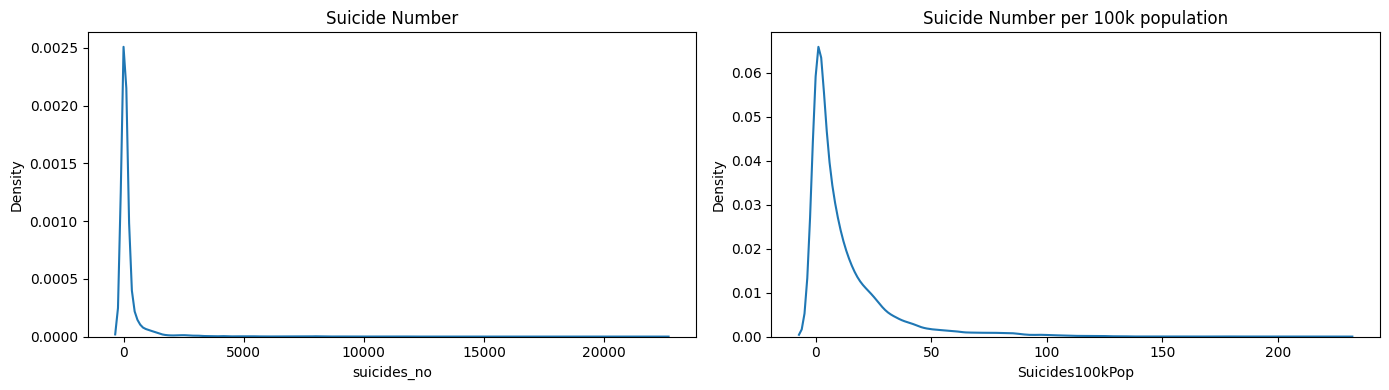

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.title('Suicide Number')
sns.distplot(data['suicides_no'],hist=False)

plt.subplot(1,2,2)
plt.title('Suicide Number per 100k population')
sns.distplot(data['Suicides100kPop'],hist=False)

plt.tight_layout()

# Inference:

1- The plot is right skewed with median (25) much less than the mean (243), a significant difference.
<br/>
2- 99% values seem to be below 5000, the variance is very high sucide numbers lets us explore why is that a case

## Country

In [19]:
lat_long = pd.read_csv('./country_data.csv')

In [20]:
lat_long.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [21]:
lat_long.rename(columns={'country':'countrycode','name':'country'},inplace=True)
lat_long.head()

,countrycode,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [22]:
# Checking if all the values in one Dataframe is present in other or not
temp1 = pd.DataFrame(data.country.unique())
temp2 = pd.DataFrame(lat_long.country.unique())
temp2.equals(temp1)

False

In [23]:
# Checking the values which are not present in lat_long
df = data.copy()
df = df.merge(lat_long,how='left',on='country')
df.loc[df.countrycode.isnull()].country.unique()

array(['Cabo Verde', 'Republic of Korea', 'Russian Federation',
       'Saint Vincent and Grenadines'], dtype=object)

In [24]:
#Correcting the country names in our data set, then merging the dataset with lat_long
data.loc[df['country']=='Cabo Verde', 'country'] = 'Cape Verde'
data.loc[df['country']=='Republic of Korea', 'country'] = 'South Korea'
data.loc[df['country']=='Russian Federation', 'country'] = 'Russia'
data.loc[df['country']=='Saint Vincent and Grenadines', 'country'] = 'Saint Vincent and the Grenadines'
data = data.merge(lat_long[['latitude','longitude','country']], how = 'left', on = 'country')

In [25]:
# Adding the column suicide_country with total suicides in a country value

temp = data.copy()
table = temp.groupby(['country'])['suicides_no'].sum()
temp = temp.merge(table.reset_index(),how='left',on='country')
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,latitude,longitude
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,Generation X,41.153332,20.168331
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,Silent,41.153332,20.168331
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,Generation X,41.153332,20.168331
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,G.I. Generation,41.153332,20.168331
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,Boomers,41.153332,20.168331


In [26]:
#As we had seen earlier, the last percentile had a significant difference.
#Looking at the countries included with the last percentile of suicides_no value.

data['country'].loc[data['suicides_no'].between(np.percentile(data.suicides_no,99),
                                                     np.percentile(data.suicides_no,100))].unique()

array(['Japan', 'South Korea', 'Russia', 'Ukraine', 'United States'],
      dtype=object)

<Axes: xlabel='country'>

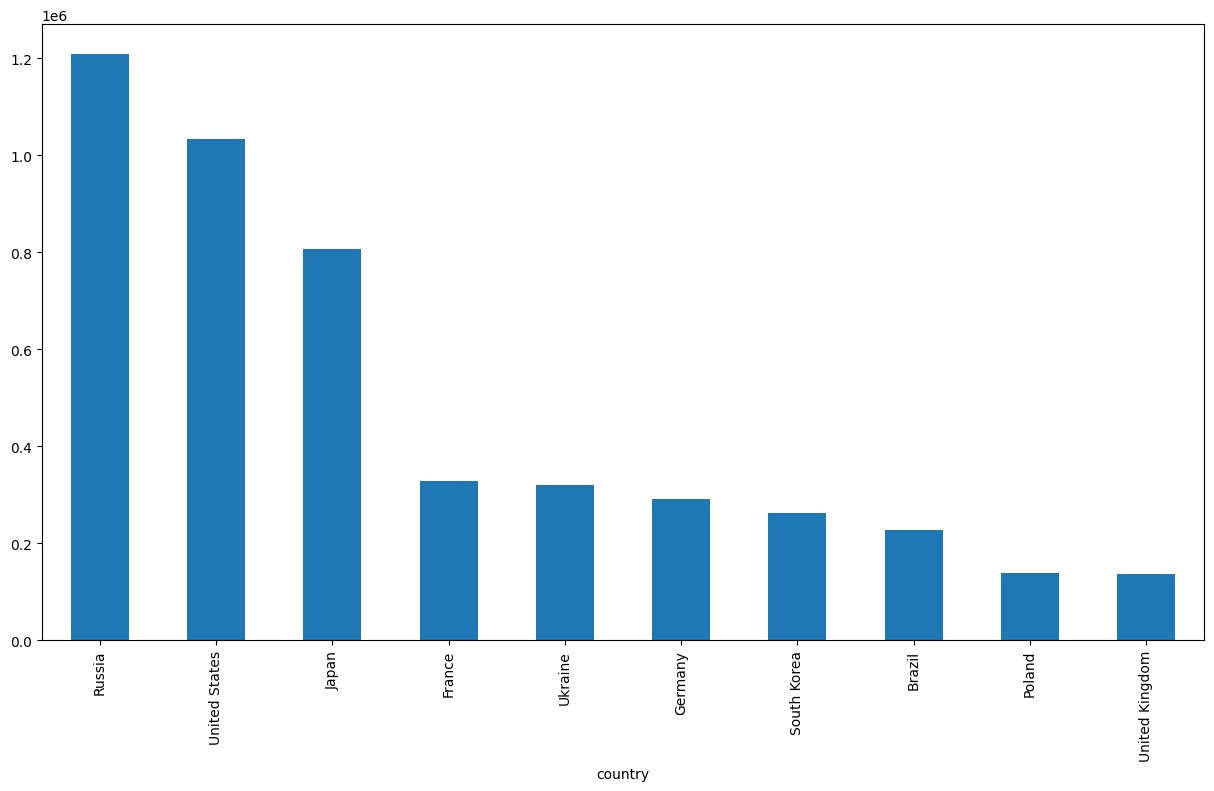

In [27]:
# Visualizing the top 10 countries with highest total sucide numbers

df = data.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False).head(10)
df.plot.bar(figsize=(15,8))

## Inference:

1- We can see that the top three countries with highest suicide count are - Russia , Japan , United States of America


<Axes: xlabel='country'>

<Figure size 800x600 with 0 Axes>

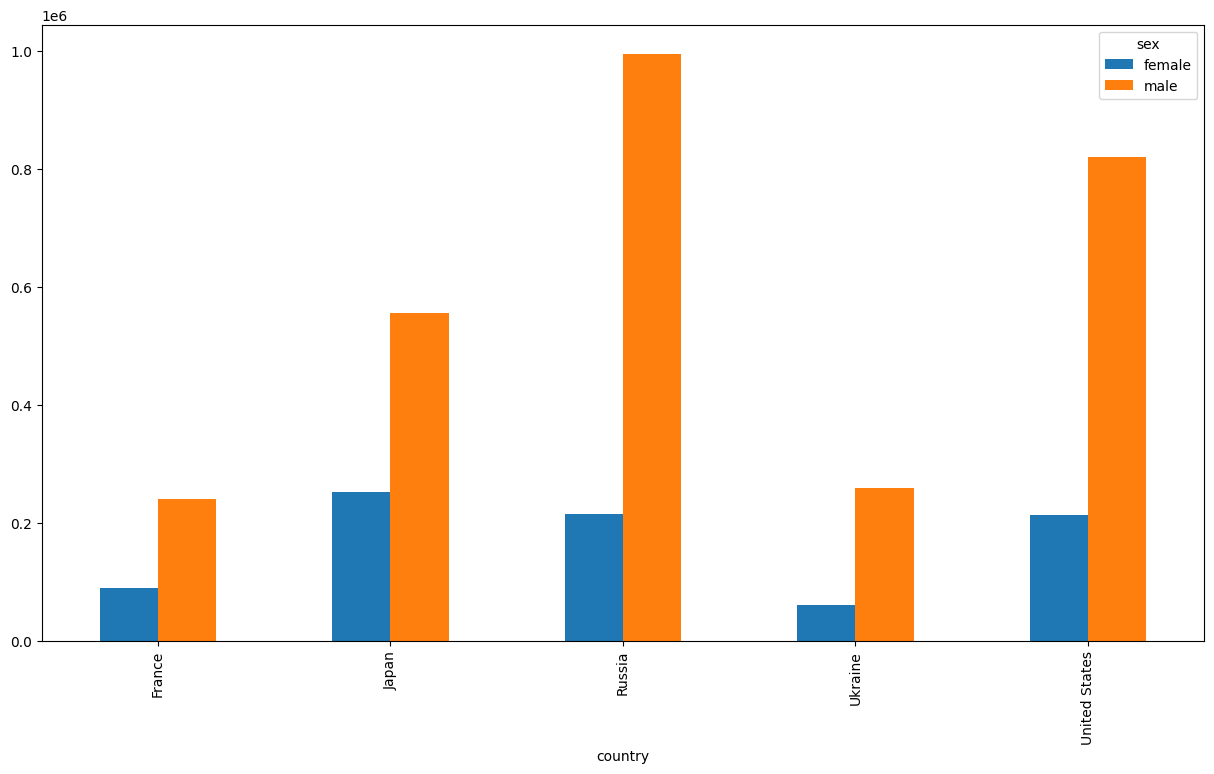

In [28]:
#Visualizing the Top 5 countries with total suicides between 1985 to 2016, gender-wise against the total suicide number
plt.figure(figsize=(8,6))
df = data.loc[((data.country=='Russia') | (data.country=='United States')
                     | (data.country=='Japan') | (data.country=='France')
                    | (data.country=='Ukraine'))].groupby(['country','sex'])['suicides_no'].sum().unstack(fill_value=0).head(10)
df.plot.bar(figsize=(15,8))

## Inference:

1- we can see that the top five countries with highest total suicides the number of maes suicides are consistently higher than female ones

In [30]:
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,latitude,longitude
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,Generation X,41.153332,20.168331
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,Silent,41.153332,20.168331
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,Generation X,41.153332,20.168331
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,G.I. Generation,41.153332,20.168331
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,Boomers,41.153332,20.168331


In [33]:
#Adding the column suicide_country with total suicides in a country value
temp = data.copy()
table = temp.groupby(['country'])['suicides_no'].sum()
temp = temp.merge(table.reset_index(), how='left',on='country')
data['suicide_country'] = temp['suicides_no_y']
data.head()

,country,year,sex,age,suicides_no,population,Suicides100kPop,GDPForYear,GDPPerCapita,generation,latitude,longitude,suicide_country
0,Albania,1987,male,15-24 years,21,312900,6.71,2156.6249,796,Generation X,41.153332,20.168331,1970
1,Albania,1987,male,35-54 years,16,308000,5.19,2156.6249,796,Silent,41.153332,20.168331,1970
2,Albania,1987,female,15-24 years,14,289700,4.83,2156.6249,796,Generation X,41.153332,20.168331,1970
3,Albania,1987,male,75+ years,1,21800,4.59,2156.6249,796,G.I. Generation,41.153332,20.168331,1970
4,Albania,1987,male,25-34 years,9,274300,3.28,2156.6249,796,Boomers,41.153332,20.168331,1970


Text(0.5, 1.0, 'Suicide Number - Countrywise')

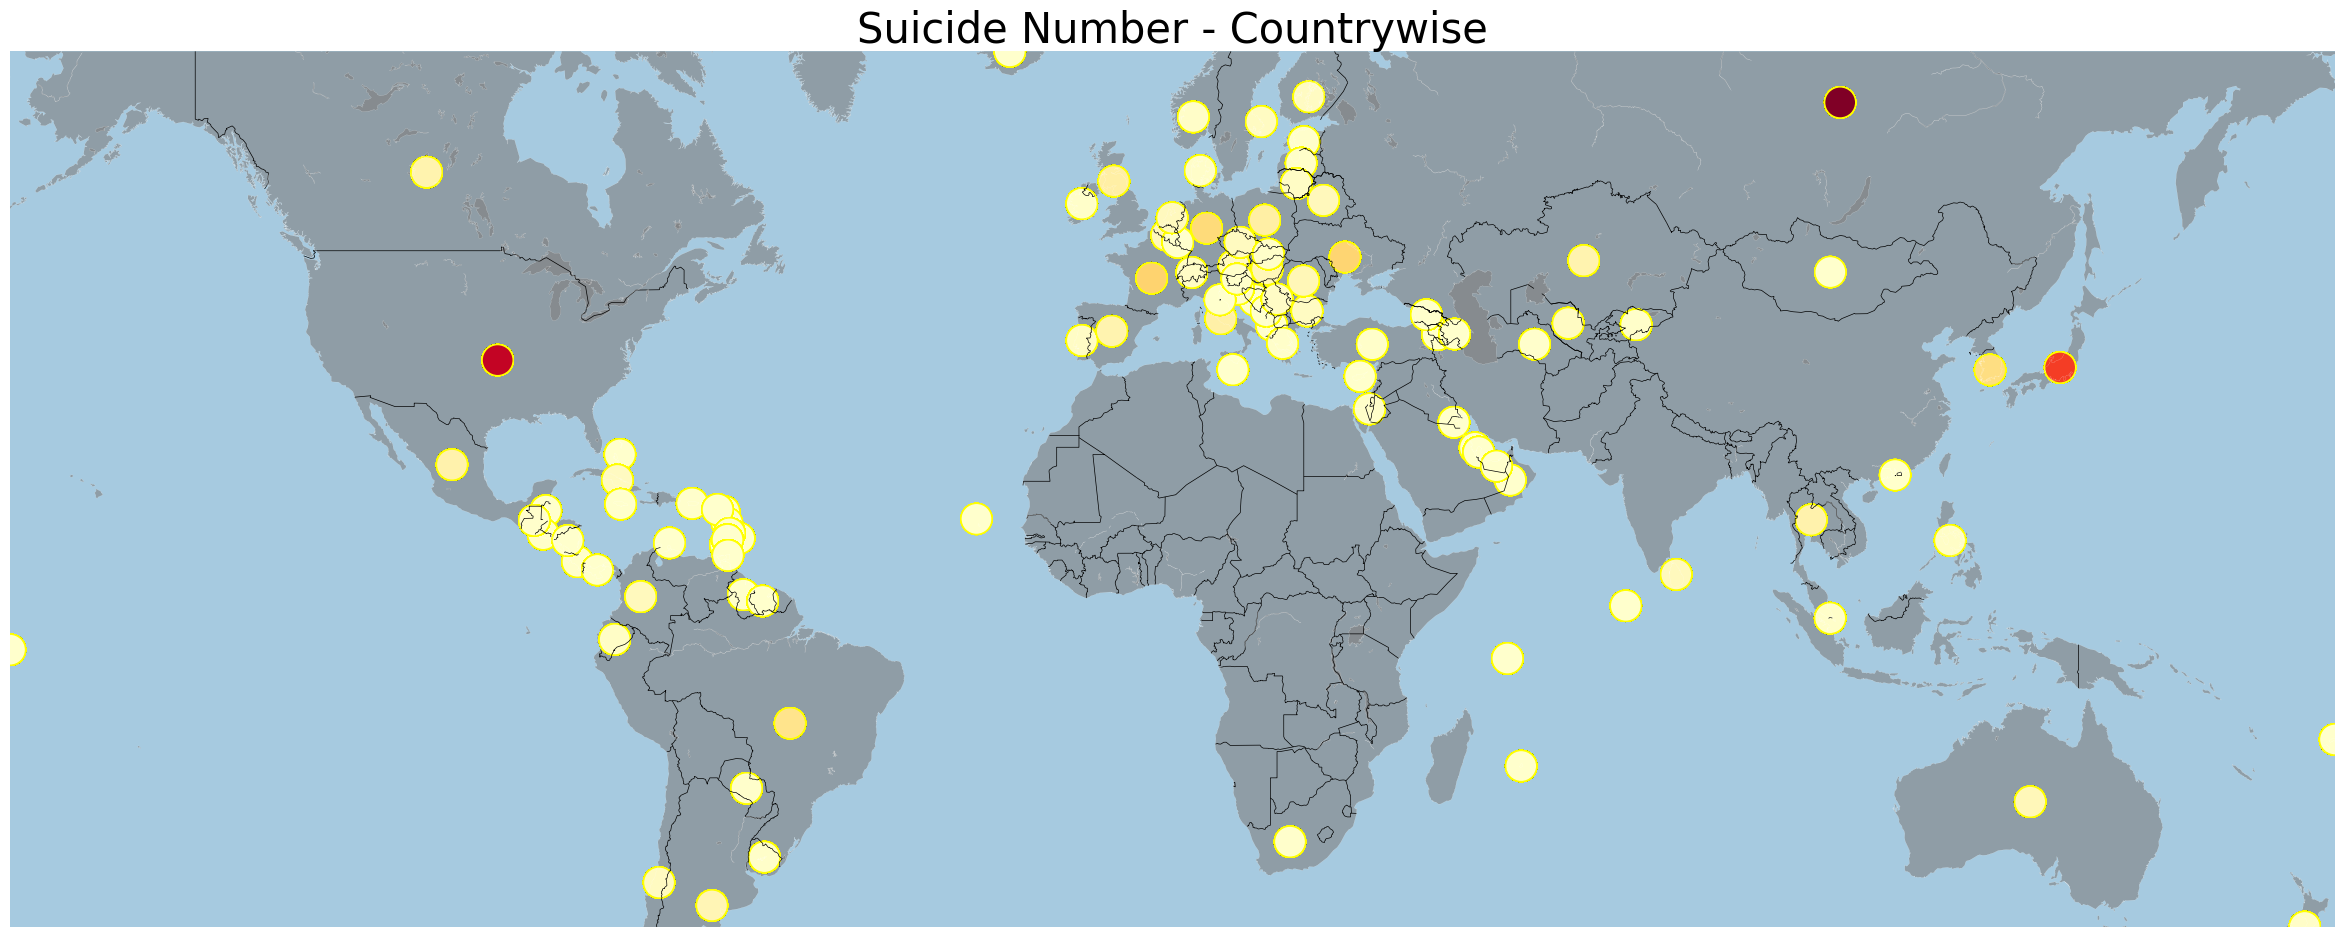

In [34]:
# Visualizing the countries with total suicide counts on a map
from mpl_toolkits.basemap import Basemap
lat_min = min(data['latitude'])
lat_max = max(data['latitude'])
lon_min = min(data['longitude'])
lon_max = max(data['longitude'])

m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,
    urcrnrlat=lat_max,
    llcrnrlon=lon_min,
    urcrnrlon=lon_max,
    resolution='l'
)
# Draw the components of the map

longitudes = data['longitude'].tolist()
latitudes = data['latitude'].tolist()
suicide_count = data['suicide_country'].values
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1)
ax = m.drawcountries()
ax = m.drawcoastlines(linewidth=0.1, color="white")
ax = m.fillcontinents(color='grey', alpha=0.6, lake_color='grey')
ax = m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
ax = m.scatter(longitudes, latitudes, c=suicide_count,s=500, zorder = 1,linewidth=1,latlon=True, edgecolors='yellow',cmap='YlOrRd'
               ,alpha=1)
plt.title('Suicide Number - Countrywise', fontsize=30)

## Inference:

Looking at the map, we can see that the data present is for only some of the countries, so we can not derive any global inference from our analysis, nor can we generalize the data by aggregating the countries into continents

Most of the countries we have data of belong to European and American continent


<Axes: xlabel='country'>

<Figure size 800x600 with 0 Axes>

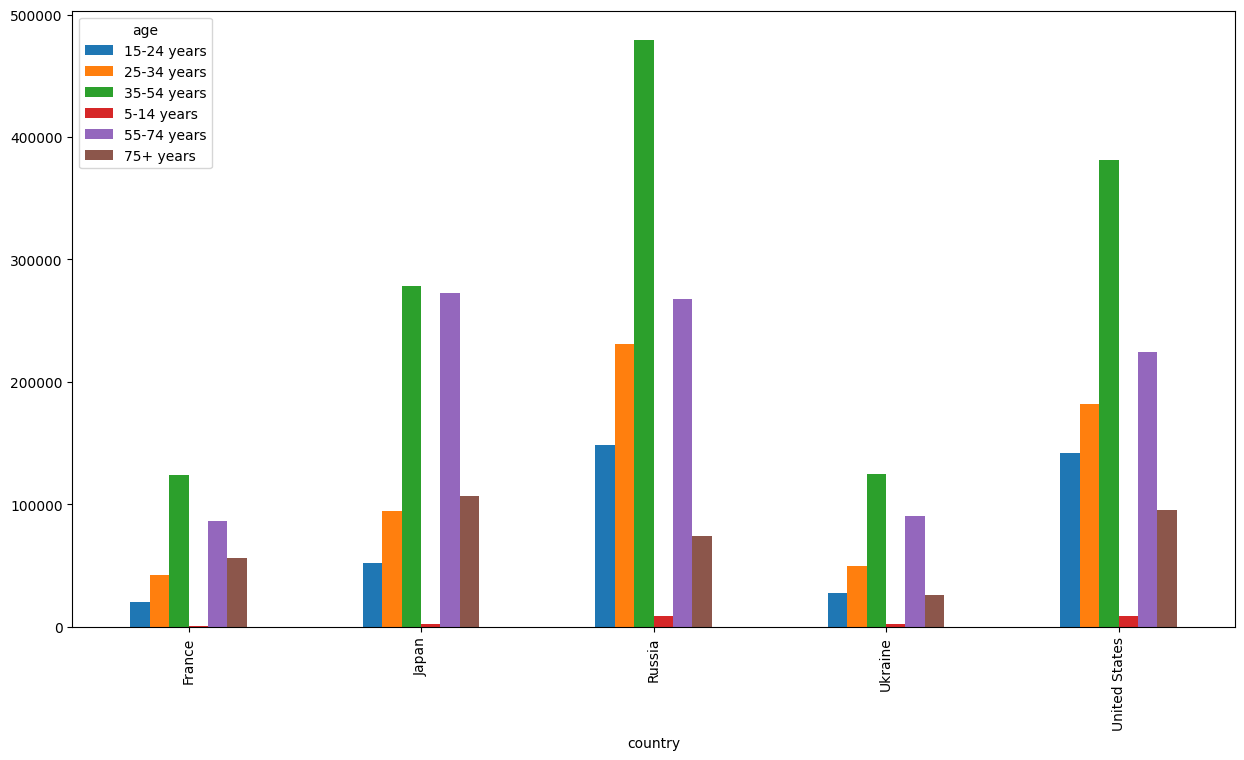

In [39]:
plt.figure(figsize=(8,6))
df = data.loc[((data.country=='Russia') | (data.country=='United States')
                     | (data.country=='Japan') | (data.country=='France')
                    | (data.country=='Ukraine'))].groupby(['country','age'])['suicides_no'].sum().unstack(fill_value=0).head(10)
df.plot.bar(figsize=(15,8))

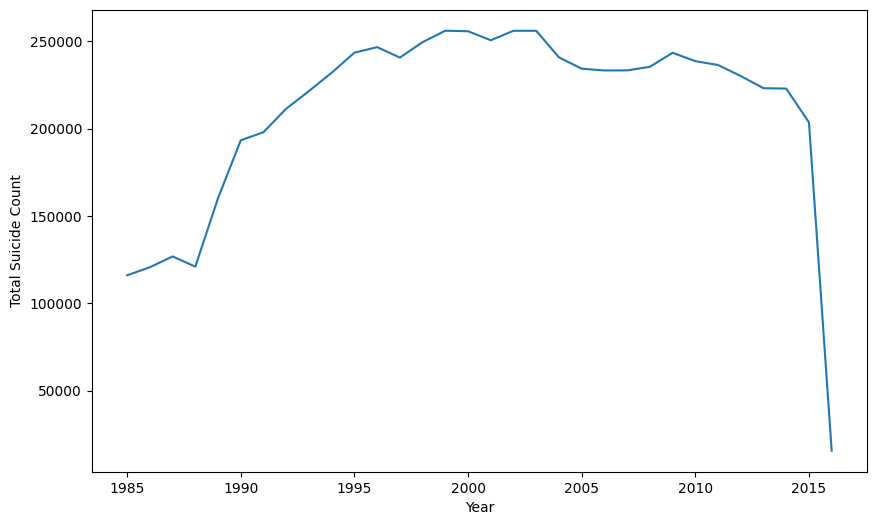

<Axes: xlabel='year'>

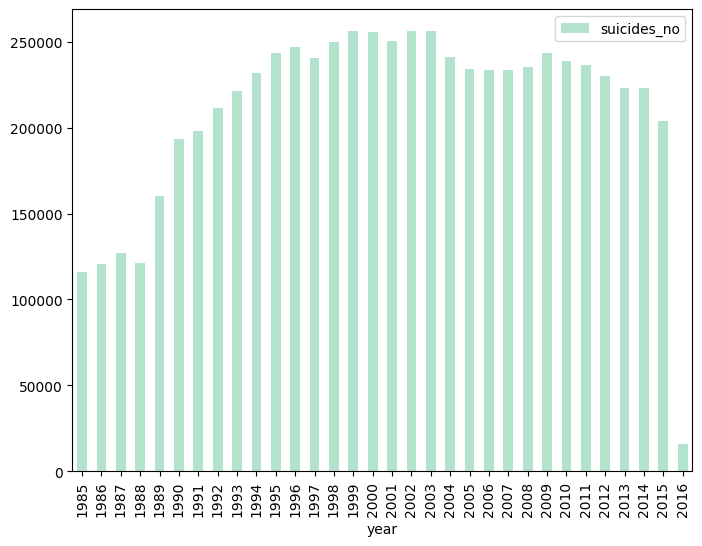

In [42]:
# Year against the total suicides that year, avg GDP and average total population of that year.
plt.figure(figsize=(10, 6))


df_time = data.groupby(["year"]).suicides_no.sum()
sns.lineplot(data = df_time)
plt.xlabel("Year")
plt.ylabel("Total Suicide Count")
plt.show()

#Year against suicide rate of the year Bar plot
df = data.groupby(['year'])['suicides_no'].sum()
df.plot(kind='bar',legend=True,figsize=(8,6),colormap='Pastel2')

In [46]:
print("Percent rows of 2015 :",round((len(data.loc[data.year==2015])/len(data.index))*100,2),"%")
print("Countries recorded in 2015 : ", len(data['country'].loc[data.year==2015].unique()))
print("Percent rows of 2016 :",round((len(data.loc[data.year==2016])/len(data.index))*100,2),"%")
print("Countries recorded in 2015 : ",len(data['country'].loc[data.year==2016].unique()))

Percent rows of 2015 : 2.67 %
Countries recorded in 2015 :  62
Percent rows of 2016 : 0.58 %
Countries recorded in 2015 :  16


## Inference:

1- Year - Suicide count:

  - The suicide rate seems to be increasing between 1985 - 2000 and then slight decrease by 2015
  - The significant differnece between 2015-2016 might be because of less records in 2016 rather than any significant change in the suicide rate.

1- Year - Avg GDP
   - Avg GDP per year seem to have an increasing trend from 1985 - 2015

In [47]:
# Seeing the total number of suicides in a country in a particular year
temp = data.copy()
table = temp.groupby(['country','year'])['suicides_no'].sum()
temp = temp.merge(table.reset_index(), how='left',on=['country','year'])
temp = temp.sort_values(by='suicides_no_y',ascending = False)
temp[['country','year','suicides_no_y']].drop_duplicates(keep='last').head(50)

,country,year,suicides_no_y
20999,Russia,1994,61420
21019,Russia,1995,60548
21022,Russia,1996,57511
21067,Russia,1999,56974
21080,Russia,2001,56958
21078,Russia,2000,56619
20984,Russia,1993,55846
21093,Russia,2002,55024
21032,Russia,1997,54746
21050,Russia,1998,51518


Inference:

Clearly Russia, United States and Japan are topping the list

<Axes: xlabel='country'>

<Figure size 800x600 with 0 Axes>

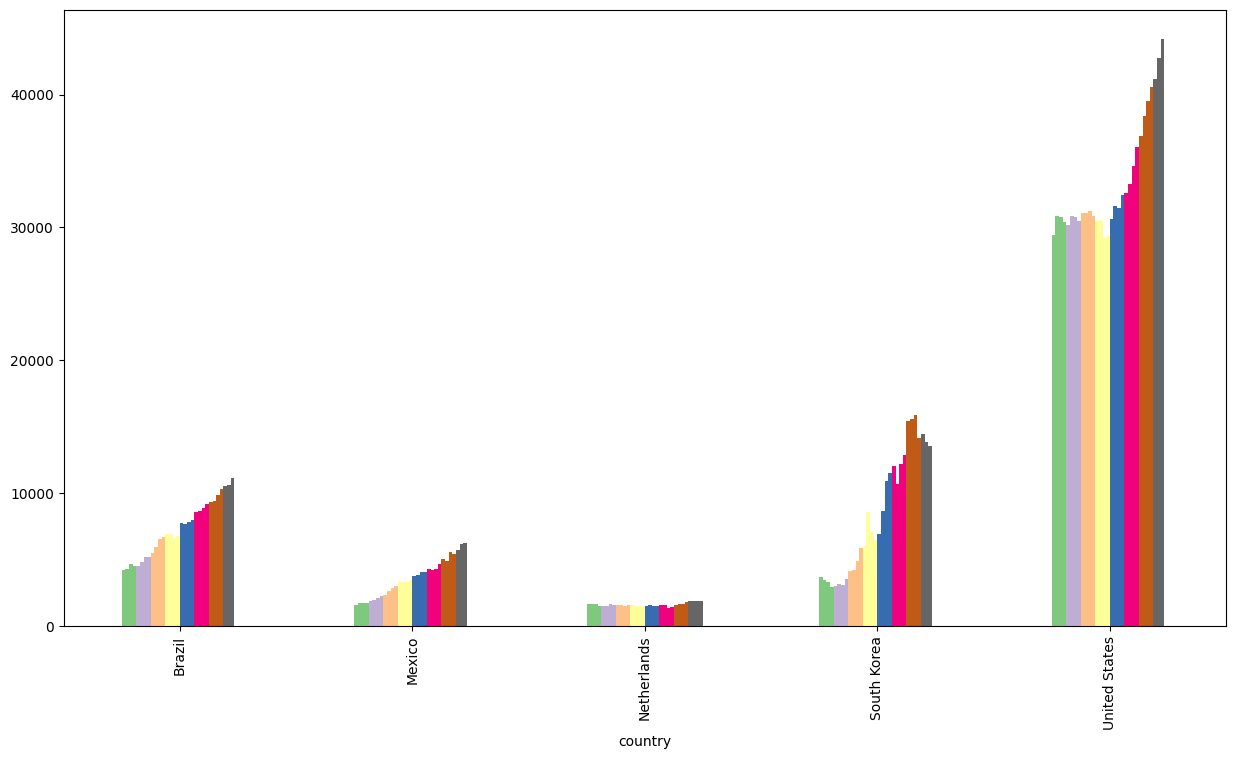

In [49]:
#Visualising the top five countries with an increasing suicide rate trend for past 15 years.
plt.figure(figsize=(8,6))
df = data.loc[((data.country=='United States') | (data.country=='Brazil')
                     | (data.country=='South Korea') | (data.country=='Mexico')
                    | (data.country=='Netherlands'))].groupby(['country','year'])['suicides_no'].sum().unstack(fill_value=0).head(10)
df.plot.bar(figsize=(15,8),legend=False,colormap='Accent')

Inference:

While Brazil, Mexico and United States clearly show the increasing trend, South Korea has had it's peak in 1990's but it is an increasing trend clearly. For Netherlands, it mostly seems constant with insignificant increasing number of suicide.

In [51]:
# Seeing the countries with maximum number of suicides in 2015

data[(data.year==2015)].groupby(['year','country'])['suicides_no'].sum().sort_values(ascending = False).head(10)

year  country       
2015  United States     44189
      Russia            25432
      Japan             23092
      South Korea       13510
      Brazil            11163
      Germany           10088
      Ukraine            7574
      Mexico             6234
      Poland             5420
      United Kingdom     4910
Name: suicides_no, dtype: int64

<Axes: xlabel='age'>

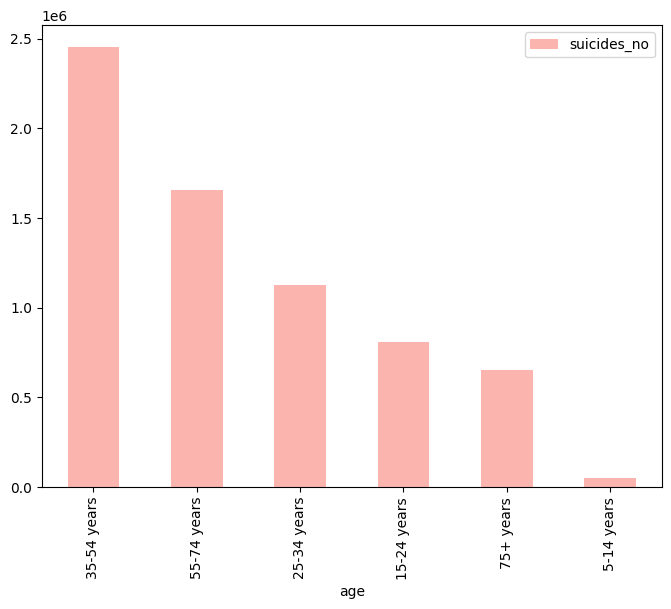

In [52]:
# A simple view of total number of suicides per age category in all the years from 1985 to 2016
df = data.groupby(['age'])['suicides_no'].sum().sort_values(ascending=False)
df.plot(kind='bar',legend=True,figsize=(8,6),colormap='Pastel1')

<Axes: xlabel='age'>

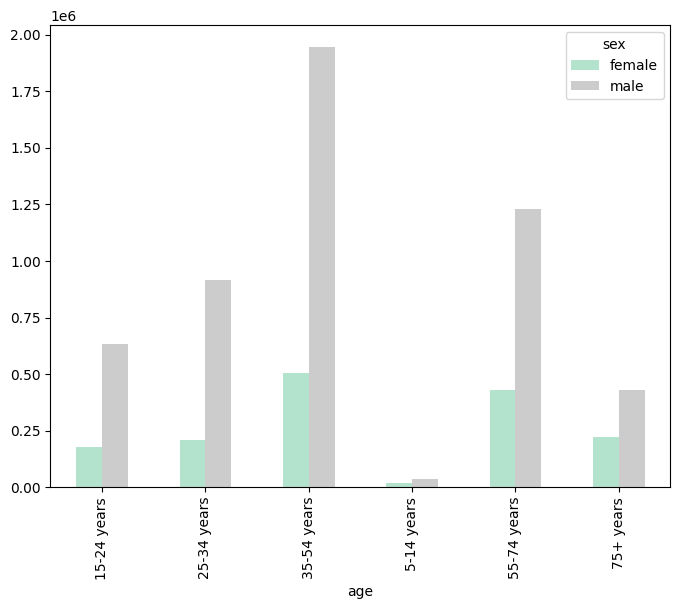

In [53]:
# Seeing the sex wise categorization of age in suicide numbers
df = data.groupby(['age','sex'])['suicides_no'].sum().unstack(fill_value=0)
df.plot(kind='bar',legend=True,figsize=(8,6),colormap='Pastel2')

In [54]:
# In 2015 - most populations countries in the dataset

data[(data.year==2015)].groupby(['country'])['population'].sum().sort_values(ascending = False).head(10)

country
United States     300078511
Brazil            191087085
Russia            137018943
Japan             120376310
Mexico            114357884
Germany            78136683
Turkey             71880464
Thailand           61261276
United Kingdom     61082942
Italy              58117697
Name: population, dtype: int64

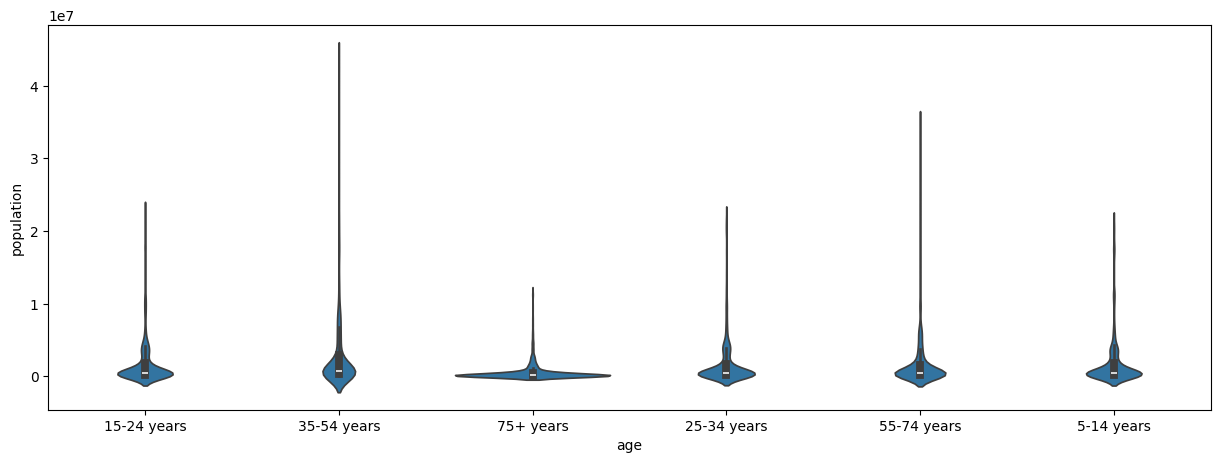

In [56]:
plt.figure(figsize=(15,5))
ax = sns.violinplot(x="age", y="population", data=data)

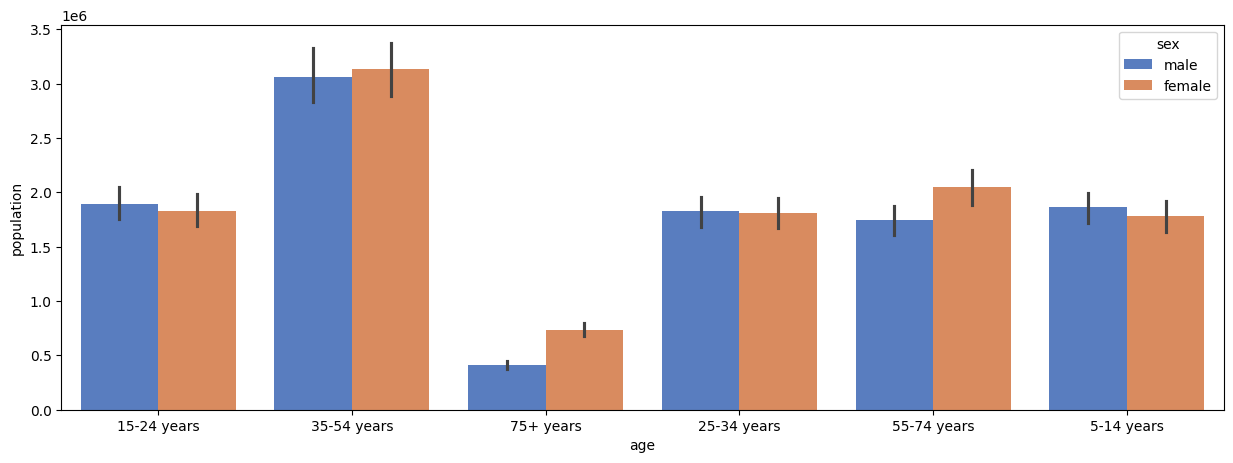

In [57]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="age", y="population", hue="sex", data=data, palette="muted")